In [69]:

import pandas as pd
import matplotlib.pyplot as plt

def load(path, idx, group):
    data = pd.read_csv(path, sep=';')

    data = data.drop(columns=['Constraints','strictreject','constrainthandlingmethod.1','constrainthandlingmethod','trailsmode','optimumfound'])

    data = data.rename(columns=lambda x: x.strip())

    data.loc[:, 'fitnessfunction'] = pd.to_numeric(data.loc[:, 'fitnessfunction'].str.replace('Fitness function ',''))
    data.loc[:,'lonelyturtles'] = data.loc[:,'lonelyturtles'] / data.loc[:,'populationsize']
    data.loc[:,'numclusters'] = data.loc[:,'numclusters'] / data.loc[:,'populationsize']

    data = data.set_index(idx)
    data = data.sort_index()

    data = data.groupby(group).agg({
            'globalbestval':'mean',
            'numclusters':'mean',
            'avgdistancetooptimum':'mean',
            'mindistancetooptimum':'mean',
            'avgneighborcount':'mean',
            'lonelyturtles':'mean',
            'avgdistanceofturtles':'mean',
            'violations':'mean',
            'iterations':'median',
            'meanpathlength':'mean'
        })

    data = data[data['iterations'] > 0]
    return data

                                     globalbestval  numclusters  \
fitnessfunction populationsize step                               
1               20             1          0.664501     0.980000   
                               2          0.674057     0.980000   
                               3          0.692436     0.980000   
                               4          0.699572     0.973333   
                               5          0.702352     0.976667   
...                                            ...          ...   
3               100            195        0.987750     0.497333   
                               196        0.987750     0.502000   
                               197        0.987750     0.488000   
                               198        0.987750     0.485333   
                               199        0.987972     0.492667   

                                     avgdistancetooptimum  \
fitnessfunction populationsize step                         
1     

<ipython-input-63-190245d2b02c>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot = fig.add_subplot(2, 3,idx+1)
<ipython-input-63-190245d2b02c>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot = fig.add_subplot(2, 3,idx+1)
<ipython-input-63-190245d2b02c>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new 

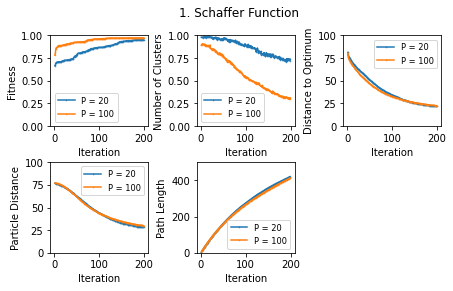

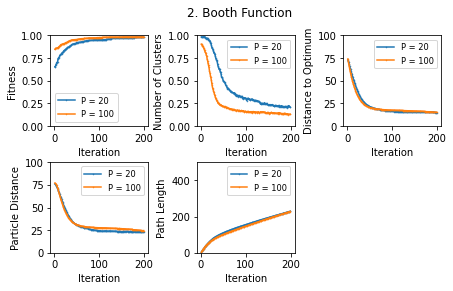

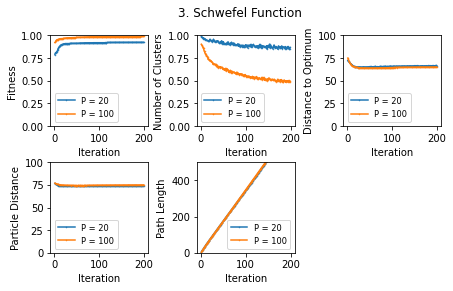

In [63]:
# EXPERIMENT 1
data = load("H:\sos-ex-1\strong-personal-focus.csv",
            idx=['runnumber', 'step','fitnessfunction','populationsize'],
            group=['fitnessfunction','populationsize','step'])

fitness_functions = [1,2,3]
population_sizes = [20,100]

plot_vars= ['globalbestval','numclusters','avgdistancetooptimum','avgdistanceofturtles','meanpathlength']
print(data)

display_names = {
    'globalbestval':'Fitness',
    'numclusters':'Number of Clusters',
    'avgdistancetooptimum':'Distance to Optimum',
    'avgdistanceofturtles': 'Particle Distance',
    'meanpathlength': 'Path Length'
}

y_limits = {
     'globalbestval':(0,1),
     'numclusters':(0,1),
    'avgdistancetooptimum':(0,100),
    'avgdistanceofturtles': (0,100),
    'meanpathlength': (0,500)
}

fitness_names = {
    1:'Schaffer',
    2:'Booth',
    3:'Schwefel'
}


for fitness_function in fitness_functions:

    fig = plt.figure(figsize=(7,4))
    fig.suptitle('{}. {} Function'.format(fitness_function, fitness_names[fitness_function]))
    for population_size in population_sizes:
        for idx,plot_var in enumerate(plot_vars):
            subplot = fig.add_subplot(2, 3,idx+1)
            idx = pd.IndexSlice
            iter = data.loc[idx[fitness_function,population_size,:],'iterations']
            d = data.loc[idx[fitness_function,population_size,:],plot_var]
            subplot.plot(iter, d, marker='.', markersize=1, label='P = {}'.format(population_size))
            subplot.set_xlabel('Iteration')
            subplot.set_ylabel(display_names[plot_var])
            subplot.legend(fontsize ='small')
            subplot.set_ylim(y_limits[plot_var])
    fig.subplots_adjust(hspace=0.4, wspace=0.5)
    fig.savefig(f'plots/ex1-{fitness_function}.pdf')



                                     globalbestval  numclusters  \
fitnessfunction populationsize step                               
1               10             1          0.552054     0.986667   
                               2          0.554224     0.993333   
                               3          0.560120     0.953333   
                               4          0.569362     0.960000   
                               5          0.576144     0.926667   
...                                            ...          ...   
3               100            45         1.000000     0.176667   
                               46         1.000000     0.178000   
                               47         1.000000     0.168667   
                               48         1.000000     0.166667   
                               49         1.000000     0.162667   

                                     avgdistancetooptimum  \
fitnessfunction populationsize step                         
1     

<ipython-input-80-e2482138c789>:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot = fig.add_subplot(2, 3,idx+1)
<ipython-input-80-e2482138c789>:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot = fig.add_subplot(2, 3,idx+1)
<ipython-input-80-e2482138c789>:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new 

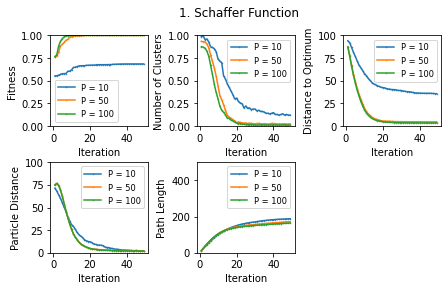

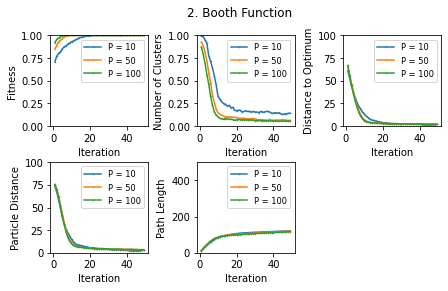

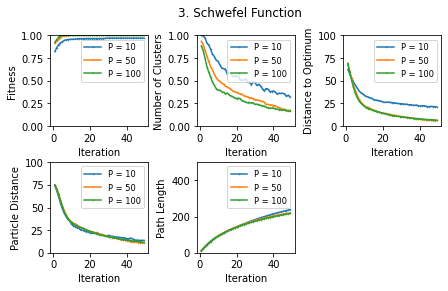

In [80]:
# EXPERIMENT 2
data = load("H:\sos-ex-2\populationsize.csv",
            idx=['runnumber', 'step','fitnessfunction','populationsize'],
            group=['fitnessfunction','populationsize','step'])

fitness_functions = [1,2,3]
population_sizes = [10, 50,100]

plot_vars= ['globalbestval','numclusters','avgdistancetooptimum','avgdistanceofturtles','meanpathlength']
print(data)

display_names = {
    'globalbestval':'Fitness',
    'numclusters':'Number of Clusters',
    'avgdistancetooptimum':'Distance to Optimum',
    'avgdistanceofturtles': 'Particle Distance',
    'meanpathlength': 'Path Length'
}

y_limits = {
    'globalbestval':(0,1),
    'numclusters':(0,1),
    'avgdistancetooptimum':(0,100),
    'avgdistanceofturtles': (0,100),
    'meanpathlength': (0,500)
}

fitness_names = {
    1:'Schaffer',
    2:'Booth',
    3:'Schwefel'
}


for fitness_function in fitness_functions:

    fig = plt.figure(figsize=(7,4))
    fig.suptitle('{}. {} Function'.format(fitness_function, fitness_names[fitness_function]))
    for population_size in population_sizes:
        for idx,plot_var in enumerate(plot_vars):
            subplot = fig.add_subplot(2, 3,idx+1)
            idx = pd.IndexSlice
            iter = data.loc[idx[fitness_function,population_size,:],'iterations']
            d = data.loc[idx[fitness_function,population_size,:],plot_var]
            subplot.plot(iter, d, marker='.', markersize=1, label='P = {}'.format(population_size))
            subplot.set_xlabel('Iteration')
            subplot.set_ylabel(display_names[plot_var])
            subplot.legend(fontsize ='small')
            subplot.set_ylim(y_limits[plot_var])
    fig.subplots_adjust(hspace=0.4, wspace=0.5)
    fig.savefig(f'plots/ex2-{fitness_function}.pdf')



In [ ]:
# EXPERIMENT 3

from matplotlib.ticker import FormatStrFormatter, FuncFormatter
import math

data = load("H:\sos-ex-3\inertia.csv",
            idx=['runnumber', 'step','fitnessfunction','particleinertia'],
            group=['fitnessfunction','particleinertia','step']
            )
fitness_functions = [3]
inertias = [0.2,0.9]

plot_vars= ['globalbestval','numclusters','avgdistancetooptimum','avgdistanceofturtles','meanpathlength']
print(data)

display_names = {
    'globalbestval':'Fitness',
    'numclusters':'Number of Clusters',
    'avgdistancetooptimum':'Distance to Optimum',
    'avgdistanceofturtles': 'Particle Distance',
    'meanpathlength': 'Path Length'
}

y_limits = {
     'globalbestval':(0,1),
     'numclusters':(0,1),
    'avgdistancetooptimum':(0,100),
    'avgdistanceofturtles': (0,100),
    'meanpathlength': (0,500)
}

fitness_names = {
    1:'Schaffer',
    2:'Booth',
    3:'Schwefel'
}

def kayformatter(x, pos):
    'The two args are the value and tick position'
    if x == 0:
        return str(0)
    x = int(math.floor(x / 1000))
    return '{}k'.format(x)


formatter = FuncFormatter(kayformatter)


for fitness_function in fitness_functions:

    fig = plt.figure(figsize=(7,4))
    fig.suptitle('{}. {} Function'.format(fitness_function, fitness_names[fitness_function]))
    for inertia in inertias:
        for idx,plot_var in enumerate(plot_vars):
            subplot = fig.add_subplot(2, 3,idx+1)
            idx = pd.IndexSlice
            iter = data.loc[idx[fitness_function,inertia,:],'iterations']
            d = data.loc[idx[fitness_function,inertia,:],plot_var]
            subplot.plot(iter, d, marker='.', markersize=1, label=r'$\omega={}$'.format(inertia))
            subplot.set_xlabel('Iteration')
            subplot.set_ylabel(display_names[plot_var])
            subplot.legend(fontsize ='small')
            subplot.set_ylim(y_limits[plot_var])

            # if plot_var == 'meanpathlength':
            #     subplot.yaxis.set_major_formatter(formatter)

    fig.subplots_adjust(hspace=0.4, wspace=0.5)
    fig.savefig(f'plots/ex3-{fitness_function}.pdf')


In [ ]:
# EXPERIMENT 4

from matplotlib.ticker import FormatStrFormatter, FuncFormatter
import math

data = load("H:\sos-ex-4\confidence-comparison.csv",
            idx=['runnumber', 'step','fitnessfunction','personalconfidence','swarmconfidence', 'populationsize'],
            group=['fitnessfunction','personalconfidence','swarmconfidence','populationsize','step']
            )
fitness_functions = [1,2,3]
css = [0.3, 1.7]
cps = [0.3, 1.7]
population_sizes = [50]

plot_vars= ['globalbestval','numclusters','avgdistancetooptimum','avgdistanceofturtles','meanpathlength']
print(data)

display_names = {
    'globalbestval':'Fitness',
    'numclusters':'Number of Clusters',
    'avgdistancetooptimum':'Distance to Optimum',
    'avgdistanceofturtles': 'Particle Distance',
    'meanpathlength': 'Path Length'
}

y_limits = {
     'globalbestval':(0,1),
     'numclusters':(0,1),
    'avgdistancetooptimum':(0,100),
    'avgdistanceofturtles': (0,100),
    'meanpathlength': (0,500)
}

fitness_names = {
    1:'Schaffer',
    2:'Booth',
    3:'Schwefel'
}

for population_size in population_sizes:
    for fitness_function in fitness_functions:
        fig = plt.figure(figsize=(13,6))
        fig.suptitle('{}. {} Function (P={})'.format(fitness_function, fitness_names[fitness_function],population_size))
        for cs in css:
            for cp in cps:
                for idx,plot_var in enumerate(plot_vars):
                    subplot = fig.add_subplot(2, 3,idx+1)
                    idx = pd.IndexSlice
                    iter = data.loc[idx[fitness_function,cp,cs,population_size,:],'iterations']
                    d = data.loc[idx[fitness_function,cp,cs,population_size,:],plot_var]
                    subplot.plot(iter, d, marker='.', markersize=1, label=r'$c_p={}, c_s={}$'.format(cp,cs))
                    subplot.set_xlabel('Iteration')
                    subplot.set_ylabel(display_names[plot_var])
                    subplot.legend(fontsize ='small')
                    subplot.set_ylim(y_limits[plot_var])

        fig.subplots_adjust(hspace=0.3, wspace=0.2)
        fig.savefig(f'plots/ex4-{fitness_function}-{population_size}.pdf')



                                         globalbestval  numclusters  \
fitnessfunction particlespeedlimit step                               
1               3                  1          0.675312     0.986667   
                                   2          0.677827     0.983333   
                                   3          0.705039     0.973333   
                                   4          0.729399     0.973333   
                                   5          0.729399     0.973333   
...                                                ...          ...   
3               20                 95         0.962486     0.076667   
                                   96         0.962486     0.073333   
                                   97         0.962486     0.073333   
                                   98         0.962486     0.080000   
                                   99         0.962486     0.073333   

                                         avgdistancetooptimum  \
fitnessfunc

<ipython-input-105-6b1d1ac43daf>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot = fig.add_subplot(2, 3,idx+1)
<ipython-input-105-6b1d1ac43daf>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot = fig.add_subplot(2, 3,idx+1)
<ipython-input-105-6b1d1ac43daf>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a n

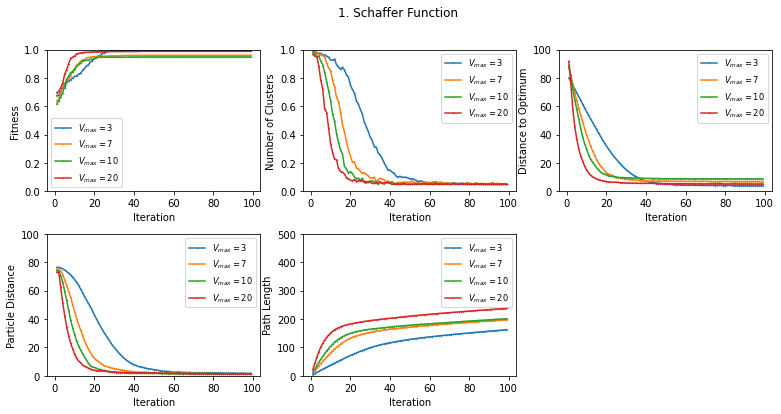

In [ ]:
# EXPERIMENT 5

from matplotlib.ticker import FormatStrFormatter, FuncFormatter
import math

data = load("H:\sos-ex-5\particle-speed-limit.csv",
            idx=['runnumber', 'step','fitnessfunction','particlespeedlimit'],
            group=['fitnessfunction','particlespeedlimit','step']
            )
fitness_functions = [1,2,3]
particle_speed_limits = [3, 7, 10, 20]

plot_vars= ['globalbestval','numclusters','avgdistancetooptimum','avgdistanceofturtles','meanpathlength']
print(data)

display_names = {
    'globalbestval':'Fitness',
    'numclusters':'Number of Clusters',
    'avgdistancetooptimum':'Distance to Optimum',
    'avgdistanceofturtles': 'Particle Distance',
    'meanpathlength': 'Path Length'
}

y_limits = {
     'globalbestval':(0,1),
     'numclusters':(0,1),
    'avgdistancetooptimum':(0,100),
    'avgdistanceofturtles': (0,100),
    'meanpathlength': (0,500)
}

fitness_names = {
    1:'Schaffer',
    2:'Booth',
    3:'Schwefel'
}

for fitness_function in fitness_functions:
    fig = plt.figure(figsize=(13,6))
    fig.suptitle('{}. {} Function'.format(fitness_function, fitness_names[fitness_function]))
    for psl in particle_speed_limits:
        for idx,plot_var in enumerate(plot_vars):
            subplot = fig.add_subplot(2, 3,idx+1)
            idx = pd.IndexSlice
            iter = data.loc[idx[fitness_function,psl,:],'iterations']
            d = data.loc[idx[fitness_function,psl,:],plot_var]
            subplot.plot(iter, d, marker='.', markersize=1, label=r'$V_{max}={'+str(psl)+'}$')
            subplot.set_xlabel('Iteration')
            subplot.set_ylabel(display_names[plot_var])
            subplot.legend(fontsize ='small')
            subplot.set_ylim(y_limits[plot_var])

    fig.subplots_adjust(hspace=0.3, wspace=0.2)
    fig.savefig(f'plots/ex5-{fitness_function}.pdf')

